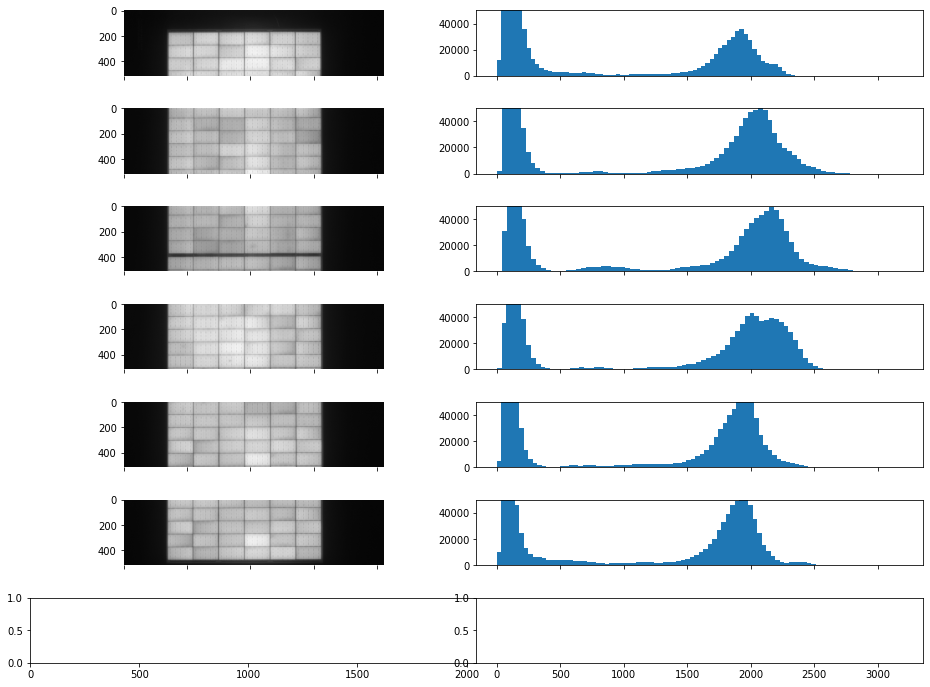

In [1]:
''' Creation: 2021.09.26
    Last update: 2021.10.01
    
    Electroluminecence greateyes raw images reading and plotting 
    
    '''

# Standard library import
import os.path
from pathlib import Path

# 3rd party imports
import matplotlib.pyplot as plt
import numpy as np

#Internal import 
import PVcharacterization_Utils as pv

file_names = ["SERAPHIM-EM-0640_Isc_ap500hXDH.dat",
              "JINERGY3272023326035_Isc_T2.dat",
              "JINERGY3272023326035_Isc_T1.dat",
              "EL_Komma_Problem.dat"
              ]
file_name = file_names[3]

file = pv.DEFAULT_DIR / Path("PVcharacterization_files") / Path(file_name)

borne_sup = np.Inf
borne_inf = 800
filter_image = False

electrolum = pv.read_electolum_file(file,pack=False)

if len(electrolum.image) > 1:
    fig = plt.figure(figsize=(16,12))
    gs = fig.add_gridspec(7,2, hspace=0.5, wspace=0)
    axe = gs.subplots(sharex='col')
    for index, image in enumerate(electrolum.image):
        #if index == 6 : break
        
        if filter_image : image = np.where((image < borne_inf) | ( image > borne_sup), 0, image)
            

        axe[index,0].imshow(image,
                   cmap='gray', 
                   interpolation=None)
        for axis in ['top','bottom','left','right']:
            axe[index,0].spines[axis].set_linewidth(0)
        
        image_flatten = image.flatten()
        if filter_image :image_flatten = image_flatten[image_flatten != 0]
        _ = axe[index,1].hist(image_flatten, bins='auto')
        axe[index,1].set_ylim([0,50000])
        
        file_gsf = os.path.splitext(file_name)[0] + '_' + str(index+1) + '.gsf'
        file = pv.DEFAULT_DIR / Path("PVcharacterization_files") / Path(file_gsf)
        pv.py2gwyddion(image, file)
        

else: # Full image treatment
    fig,axe = plt.subplots(1,2,figsize=(10,5))
    for index, image in enumerate(electrolum.image):
        if filter_image : image = np.where((image < borne_inf) | ( image > borne_sup), 0, image)
        axe[0].imshow(image,
                   cmap='gray', 
                   interpolation=None)
        for axis in ['top','bottom','left','right']:
            axe[0].spines[axis].set_linewidth(2)
            
        image_flatten = image.flatten()
        if filter_image : image_flatten = image_flatten[image_flatten != 0]
        
        _ = axe[1].hist(image.flatten(), bins='auto')
        axe[1].set_ylim([0,7*50000])
    
        file_gsf = os.path.splitext(file_name)[0] + '.gsf'
        file = pv.DEFAULT_DIR / Path("PVcharacterization_files") / Path(file_gsf)
        pv.py2gwyddion(image, file)

Text(0.5, 1.0, 'Detected lines')

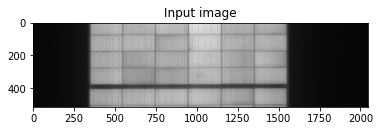

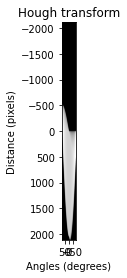

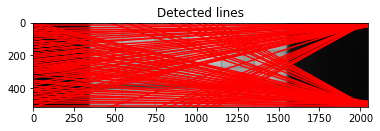

In [23]:
from skimage.transform import hough_transform

image = electrolum.image[2]

fig = plt.figure()
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Input image')

h, theta, d = hough_transform.hough_line(image)
fig = plt.figure()
plt.imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                   d[-1], d[0]],
           cmap=plt.cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')

fig = plt.figure()
plt.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    plt.plot((0, cols), (y0, y1), '-r')
plt.axis((0, cols, rows, 0))
plt.title('Detected lines')


Text(0.5, 1.0, 'Detected lines')

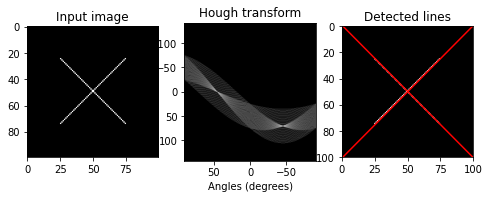

In [22]:
from skimage.transform.hough_transform import hough_line, hough_line_peaks
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Construct test image

image = np.zeros((100, 100))


# Classic straight-line Hough transform

idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

h, theta, d = hough_line(image)

plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Input image')

plt.subplot(132)
plt.imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                   d[-1], d[0]],
           cmap=plt.cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')

plt.subplot(133)
plt.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    plt.plot((0, cols), (y0, y1), '-r')
plt.axis((0, cols, rows, 0))
plt.title('Detected lines')


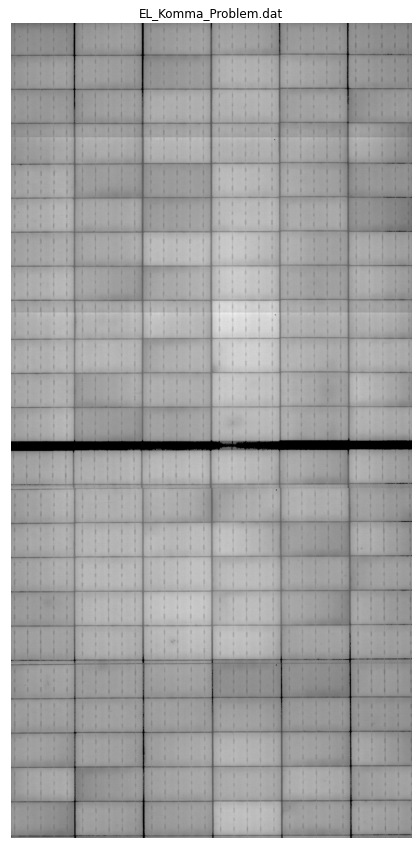

In [24]:
''' Creation: 2021.09.26
    Last update: 2021.10.04
    
    Electroluminecence greateyes raw images reading, croping and plotting 
    
    '''

# Standard library import
import os
from pathlib import Path

# 3rd party imports
import matplotlib.pyplot as plt

#Internal import 
import PVcharacterization_Utils as pv


NCOLS_SUPPRESS = 10 # Number of columns supressed for the image plotting

# Reads, crops and stitches the set of electroluminesence images acquired with greateyes camera
file_names = ["SERAPHIM-EM-0640_Isc_ap500hXDH.dat",
              "JINERGY3272023326035_Isc_T2.dat",
              "JINERGY3272023326035_Isc_T1.dat",
              "EL_Komma_Problem.dat"
              ]
file_name = file_names[3]

file = pv.DEFAULT_DIR / Path("PVcharacterization_files") / Path(file_name)

croped_image = pv.crop_image(file)

# Plots the image throwing away the NCOLS_SUPPRESS first columns
fig,axe = plt.subplots(1,1,figsize=(15,15))
axe.imshow(croped_image[:,NCOLS_SUPPRESS:],
           cmap='gray', 
           interpolation=None)
for axis in ['top','bottom','left','right']:
            axe.spines[axis].set_linewidth(0)
axe.set_xticklabels([])
axe.set_yticklabels([])
axe.set_xticks([])
axe.set_yticks([])
plt.title(file_name)

# Dumps the image in Gwyddion Simple Field Files format
file_gsf = os.path.splitext(file_name)[0] + '_full.gsf'
file = pv.DEFAULT_DIR / Path("PVcharacterization_files") / Path(file_gsf)
pv.py2gwyddion(croped_image, file) 

Text(0.5, 1.0, 'Detected lines')

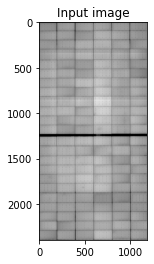

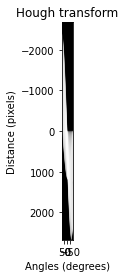

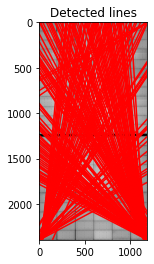

In [25]:
from skimage.transform import hough_transform

image = croped_image

fig = plt.figure()
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Input image')

h, theta, d = hough_transform.hough_line(image)
fig = plt.figure()
plt.imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
                   d[-1], d[0]],
           cmap=plt.cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')

fig = plt.figure()
plt.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    plt.plot((0, cols), (y0, y1), '-r')
plt.axis((0, cols, rows, 0))
plt.title('Detected lines')


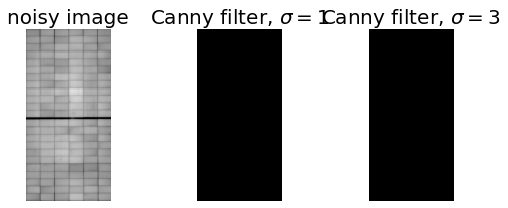

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=100)

image = croped_image

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=100)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()